# Линейные методы классификации и регрессии: метод опорных векторов

In [1]:
import warnings
warnings.filterwarnings("ignore")

## Библиотеки

In [2]:
import warnings
warnings.filterwarnings("ignore")

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    !wget -q -O requirements.txt https://raw.githubusercontent.com/andriygav/MachineLearningSeminars/master/sem5/requirements.txt
    !pip install -q -U -r requirements.txt

In [29]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm

from scipy.special import softmax
from scipy.spatial.distance import cdist
import numpy as np
import torch

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions


## SVM Classification

In [3]:
X, Y = make_classification(n_samples=150, n_features=2, 
                           n_informative=2, n_classes=2, 
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=40)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=50, 
                                                    random_state=0)


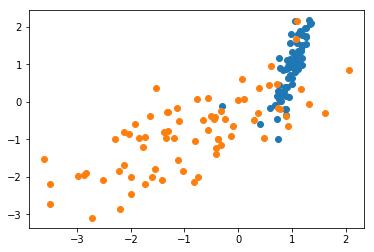

In [4]:
for k in np.unique(Y):
    plt.plot(X[Y==k, 0], X[Y==k, 1], 'o')
    
plt.show()

In [5]:
model = SVC(kernel='linear')
_ = model.fit(X_train, Y_train)

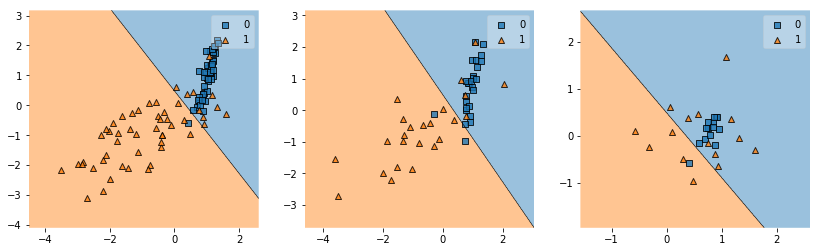

In [6]:
fig, gs = plt.figure(figsize=(14,4)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))


plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])

plt.show()

## Ядра для SVM

In [7]:
np.random.seed(0)
m = 150
n = 2
X = 10*np.random.randn(m, n)

Y = np.array((X[:,0]**2+X[:,1]**2+50*np.random.randn(m))<100, dtype=np.int64)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=50, 
                                                    random_state=0)

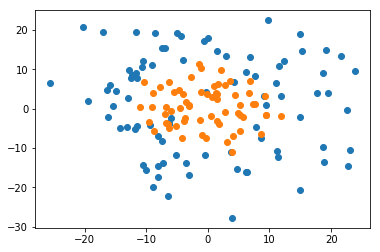

In [8]:
for k in np.unique(Y):
    plt.plot(X[Y==k, 0], X[Y==k, 1], 'o')
    
plt.show()

In [9]:
model = SVC(kernel='linear')
_ = model.fit(X_train, Y_train)

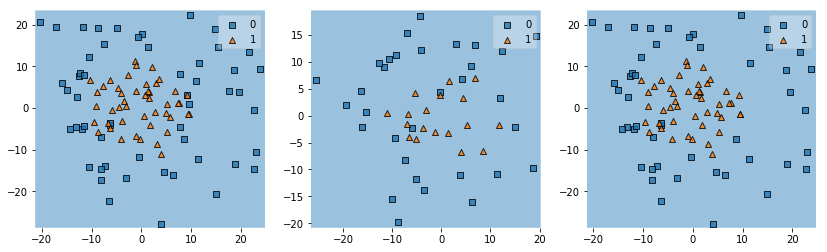

In [10]:
fig, gs = plt.figure(figsize=(14,4)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))


plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])

plt.show()

In [11]:
model = SVC(kernel='poly')
_ = model.fit(X_train, Y_train)

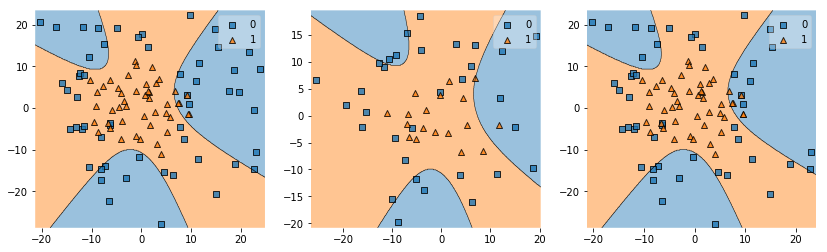

In [12]:
fig, gs = plt.figure(figsize=(14,4)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))


plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])

plt.show()

In [13]:
model = SVC(kernel='sigmoid')
_ = model.fit(X_train, Y_train)

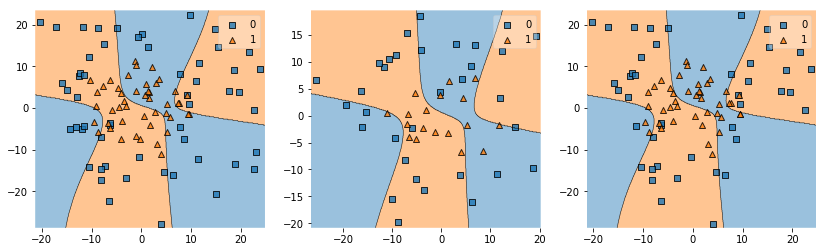

In [14]:
fig, gs = plt.figure(figsize=(14,4)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))


plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])

plt.show()

In [15]:
model = SVC(kernel='rbf')
_ = model.fit(X_train, Y_train)

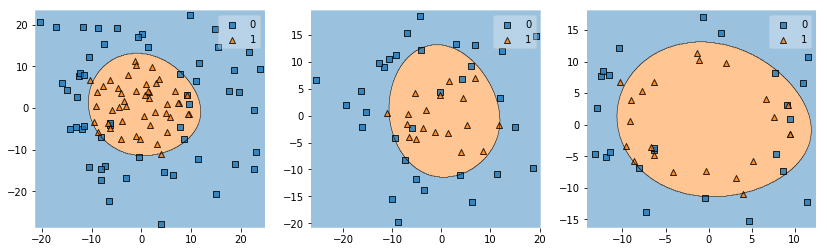

In [16]:
fig, gs = plt.figure(figsize=(14,4)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))


plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])

plt.show()

In [17]:
def kernel(X1, X2):
    return (X1@X2.T)**2

In [18]:
model = SVC(kernel=kernel)
_ = model.fit(X_train, Y_train)

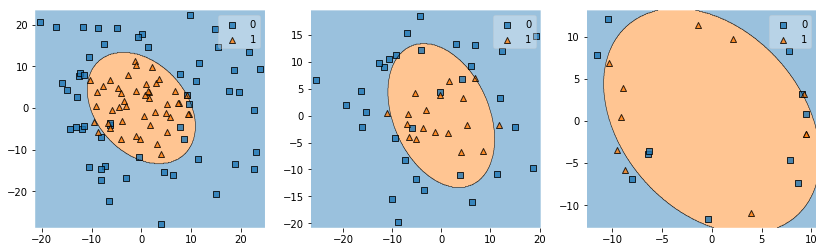

In [19]:
fig, gs = plt.figure(figsize=(14,4)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))

plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])

plt.show()

## SVM Regression

In [20]:
np.random.seed(0)
l = 150

# Генерация данных
x = np.linspace(0, 30, num=l)
Y_without_noise = x + 4*np.sin(x)
Y = Y_without_noise + 4*np.random.randn(l)

# Генерация признаков
X = np.array([x, np.sin(x)]).T

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=50, 
                                                    random_state=0)

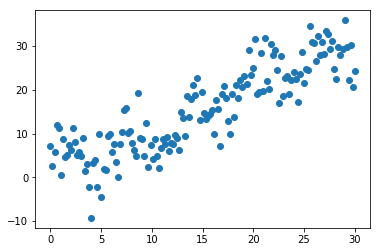

In [21]:
plt.plot(X[:, 0], Y, 'o')
    
plt.show()

In [22]:
model = SVR(kernel='rbf')
_ = model.fit(X_train, Y_train)

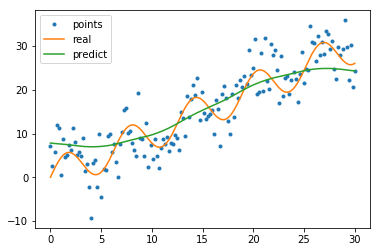

In [23]:
plt.plot(x, Y, '.', label='points')
plt.plot(x, Y_without_noise, label='real')
plt.plot(x, model.predict(X), label='predict')

plt.legend(loc='best')
plt.show()

In [24]:
model = SVR(kernel='linear')
_ = model.fit(X_train, Y_train)

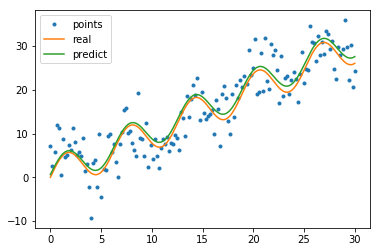

In [25]:
plt.plot(x, Y, '.', label='points')
plt.plot(x, Y_without_noise, label='real')
plt.plot(x, model.predict(X), label='predict')

plt.legend(loc='best')
plt.show()

In [26]:
np.random.seed(0)
l = 150

# Генерация данных
x = np.linspace(0, 30, num=l)
Y_without_noise = x + 4*np.sin(x)
Y = Y_without_noise + 4*np.random.randn(l)

# Генерация признаков
X = np.array([x]).T

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=50, 
                                                    random_state=0)

In [27]:
def kernel(X1, X2):
    return np.sin(X1)@np.sin(X2).T + X1@X2.T

In [28]:
model = SVR(kernel=kernel)
_ = model.fit(X_train, Y_train)

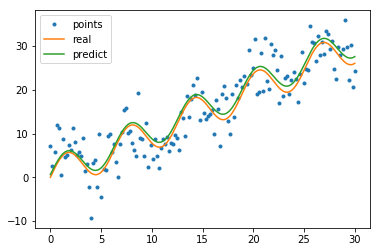

In [29]:
plt.plot(x, Y, '.', label='points')
plt.plot(x, Y_without_noise, label='real')
plt.plot(x, model.predict(X), label='predict')

plt.legend(loc='best')
plt.show()

## SVM Feature

In [30]:
X, Y = make_classification(n_samples=2500, n_features=10, 
                           n_informative=2, n_classes=2, 
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=10)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=500, 
                                                    random_state=0)



In [31]:
def kernel(X1, X2):
    return np.exp(-0.05*cdist(X1, X2)**2)

In [32]:
model = SVC(kernel='rbf')
_ = model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.91

In [33]:
X_train_new = np.hstack([kernel(X_train, X_train[model.support_]), X_train])
X_test_new = np.hstack([kernel(X_test, X_train[model.support_]), X_test])

In [34]:
model = SVC(kernel='rbf')
_ = model.fit(X_train_new, Y_train)
model.score(X_test_new, Y_test)

0.914

## Нормировка данных

Для реальных данных всегда нужно проводить предварительный анализ данных. В качтности требуется выполнить нормировку данных. Нормировка данных позволяет повысить устойчивость модели при обучении.

In [35]:
X, Y = make_classification(n_samples=150, n_features=2, 
                           n_informative=2, n_classes=2, 
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=40)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=50, 
                                                    random_state=0)

In [36]:
model = SVC(kernel='linear')
_ = model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.86

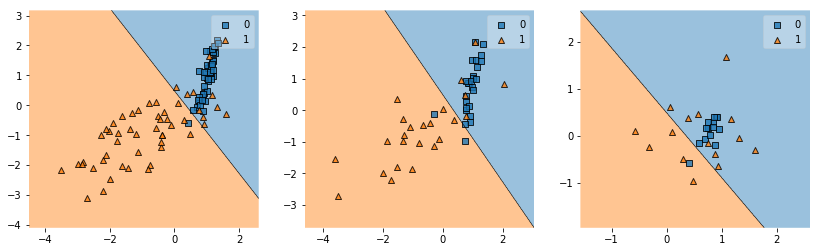

In [37]:
fig, gs = plt.figure(figsize=(14,4)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))


plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])

plt.show()

In [38]:
np.random.seed(0)
X, Y = make_classification(n_samples=150, n_features=2, 
                           n_informative=2, n_classes=2, 
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=40)

X = (X + 1000*np.random.randn(1, 2))*1000*np.random.randn(1, 2)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=50, 
                                                    random_state=0)

In [39]:
model = SVC(kernel='linear')
_ = model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.8

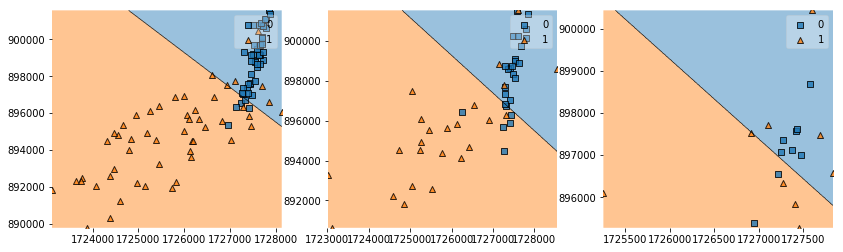

In [40]:
fig, gs = plt.figure(figsize=(14,4)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))


plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])

plt.show()

In [41]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
model = SVC(kernel='linear')
_ = model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.86

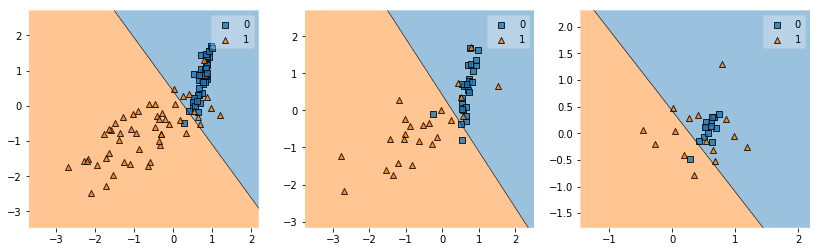

In [43]:
fig, gs = plt.figure(figsize=(14,4)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))


plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])

plt.show()

# Homework 5
**Objective** : провести эксперимент с полиномиальным ядром: сгенерировать синтетическую выборку, на которой полиномиальное ядро имеет лучшее качество аппроксимации чем rbf и линейное ядро.

**Основная идея**: помня о том, что полиномиальное ядро степени два может восстанавливать разделяющие проскости, представленные кривыми второго порядка, попробуем сгенерировать соответствующую выборку.

В нашем случае, это будет симметричная параболоида, или

$$|x| - y ^ 2 = 0$$

In [77]:
def build_dataset_uniform(size, low, high, aoi_func):
    X = np.random.uniform(low=low, high=high, size=(size, 2))
    Y = np.zeros(size).astype(np.int8)
    
    AoI = aoi_func(X)
    Y[AoI] = 1
    
    return X, Y

def get_parabolic_AoI(X):
    AoI = (np.abs(X[:, 1]) < np.sqrt(np.abs(X[:, 0])))
    
    return AoI

def plot_train_test_support(model,
                        X_train, Y_train,
                        X_test, Y_test):
    fig, gs = plt.figure(figsize=(14,4)), gridspec.GridSpec(1, 3)

    ax = []
    for i in range(3):
        ax.append(fig.add_subplot(gs[i]))


    plot_decision_regions(X_train, Y_train, model, ax=ax[0])
    plot_decision_regions(X_test, Y_test, model, ax=ax[1])
    plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])

    plt.show()

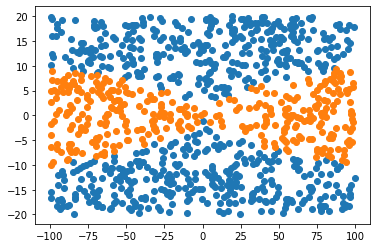

In [78]:
# build X, Y

X, Y = build_dataset_uniform(size=1000, low=[-100, -20], high=[100, 20], aoi_func=get_parabolic_AoI)


for k in np.unique(Y):
    plt.plot(X[Y==k, 0], X[Y==k, 1], 'o')
    
plt.show()

In [79]:
# Add train\test split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [80]:
# Choose best C for both kernel types

svm_grid = ParameterGrid({
    "C": [1e2, 1e3, 1e4, 1e5], # вот здесь и будет происходить подбор регуляризации
    'kernel': ['rbf', 'poly'],
    'degree' : [2] # only for poly
})

cross_val = KFold(5, shuffle=True)

scores = dict()
for item in tqdm(svm_grid):
    list_of_scores = []
    for train_index, test_index in cross_val.split(X_train):
        
        x_train_fold = X_train[train_index]
        x_test_fold = X_train[test_index]
        
        y_train_fold = Y_train[train_index]
        y_test_fold = Y_train[test_index]
                
        model = SVC(**item, tol=1e-8)
        model.fit(x_train_fold, y_train_fold)
        
        acc = accuracy_score(y_test_fold, model.predict(x_test_fold))
        
        
        list_of_scores.append(acc)
    scores[str(item)] = [np.round(np.mean(list_of_scores), 3)]

In [81]:
scores

{"{'C': 100.0, 'degree': 2, 'kernel': 'rbf'}": [0.971],
 "{'C': 100.0, 'degree': 2, 'kernel': 'poly'}": [0.971],
 "{'C': 1000.0, 'degree': 2, 'kernel': 'rbf'}": [0.983],
 "{'C': 1000.0, 'degree': 2, 'kernel': 'poly'}": [0.976],
 "{'C': 10000.0, 'degree': 2, 'kernel': 'rbf'}": [0.989],
 "{'C': 10000.0, 'degree': 2, 'kernel': 'poly'}": [0.978],
 "{'C': 100000.0, 'degree': 2, 'kernel': 'rbf'}": [0.988],
 "{'C': 100000.0, 'degree': 2, 'kernel': 'poly'}": [0.976]}

In [82]:
# Best RBF model

best_rbf = SVC(kernel='rbf', C=1e5)
best_rbf.fit(X_train, Y_train)

print(classification_report(Y_test, best_rbf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       117
           1       1.00      0.99      0.99        83

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



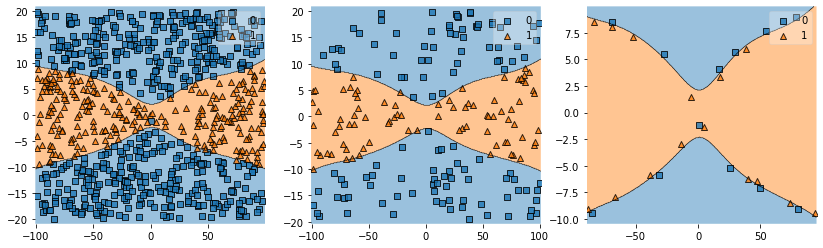

In [83]:
plot_train_test_support(best_rbf, X_train, Y_train, X_test, Y_test)

In [84]:
# Best polynomial quality

best_poly_model = SVC(kernel='poly', degree=2, C=1e5)
best_poly_model.fit(X_train, Y_train)

print(classification_report(Y_test, best_poly_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       117
           1       0.96      0.94      0.95        83

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



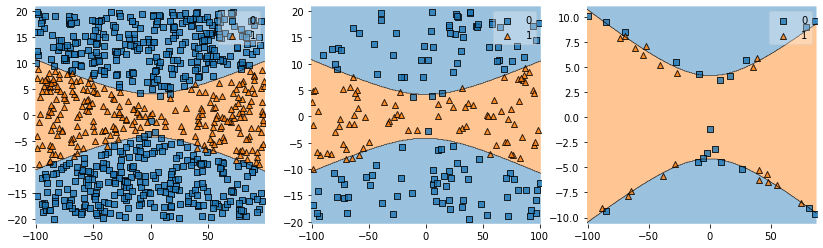

In [85]:
plot_train_test_support(best_poly_model, X_train, Y_train, X_test, Y_test)

Как видно, оба ядра хорошо справляются с такой игрушечной задачей. Более того, RBF даже работает немного лучше, чем полиномиальное ядро. Однако что будет, если мы возьмем точки, которые будут лежать дальше на прямой X?

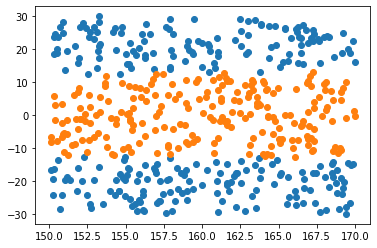

In [92]:
X_future , Y_future = build_dataset_uniform(size=500, low=[150, -30], high=[170, 30], aoi_func=get_parabolic_AoI)

for k in np.unique(Y_future):
    plt.plot(X_future[Y_future==k, 0], X_future[Y_future==k, 1], 'o')
    
plt.show()

In [93]:
print(classification_report(Y_future, best_rbf.predict(X_future)))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71       277
           1       0.00      0.00      0.00       223

    accuracy                           0.55       500
   macro avg       0.28      0.50      0.36       500
weighted avg       0.31      0.55      0.40       500



/home/serg/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/home/serg/miniconda3/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


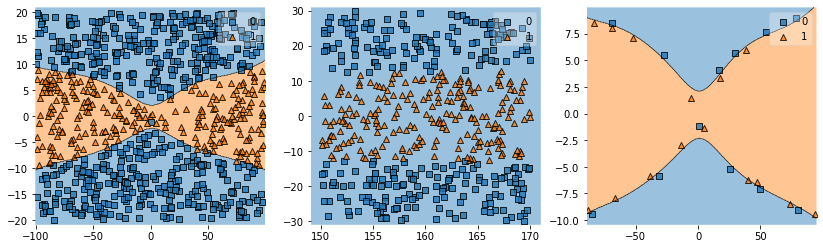

In [94]:
plot_train_test_support(best_rbf, X_train, Y_train, X_future, Y_future)

In [95]:
print(classification_report(Y_future, best_poly_model.predict(X_future)))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       277
           1       0.82      1.00      0.90       223

    accuracy                           0.90       500
   macro avg       0.91      0.91      0.90       500
weighted avg       0.92      0.90      0.90       500



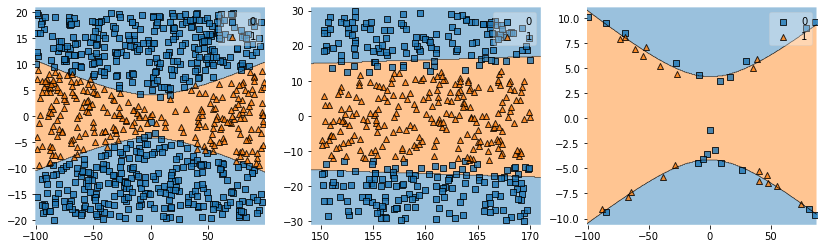

In [96]:
plot_train_test_support(best_poly_model, X_train, Y_train, X_future, Y_future)

Итак, мы видим, что качество rbf упало почти вдвое, хотя вид зависимости(симметричная парабола) в данных сохранился. В это же время полиномиальное ядро прекрасно справилось с задачей, хотя и его качество несколько снизилось. 

**Почему так получилось?**
Тут стоит учесть, что в отличие от классических ядер, которые считают скалярное произведение в некотором пространтсве, RBF ядро считает по сути расстояние от одной точки до другой. В этом смысле оно очень похоже на метрический классификатор с нетривиальным отбором объектов и весов для них. Это и его сила, и слабость одновременно:
- с одной стороны, RBF может восстанавливать сколь угодно сложные разделяющие поверхности;
- с другой стороны, если объект находится далеко от объектов обучающей выборки, то классификация ломается, скорее всего оно предскажет самый популярный класс.

Полиномиальное же ядро в состоянии выучить именно зависимость, т.е. форму разделяющей поверхности. Как только его параметры подобраны, оно будет хорошо работать на любых объектах, вне зависимости от их расположения относительно обучающей выборки.

**Замечание 1**: Конечно, можно сказать, что такое сравнение не является вполне честным, ведь распределение переменной **x** поменялось. Однако, когда мы решаем задачу машинного обучения, мы хотим получить функцию, которая описывает некоторую реальную зависимость, которая присутствует в данных. В качестве переменной **x** может выступать, например, время, и так как зависимость осталась прежней, наша выборка вполне законна.

**Замечание 2**: Конечно, если продолжить выборку ещё дальше, то качество полиномиального ядра также снизится. Это видно по тому, что некоторые синие объекты уже начинают "заползать" в исходную область. Такое несовершенство объясняется тем, что коэффициенты параболы мы восстанавливаем с некоторой точностью, и поэтому при больших значениях **х** они начинают проявлятся. Однако характер зависимости остается верным.

